In [1]:
import pandas as pd
import numpy as np
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

df = pd.read_csv('../data/train.csv', parse_dates=['Date'], dtype={'StateHoliday': np.str})


Using TensorFlow backend.


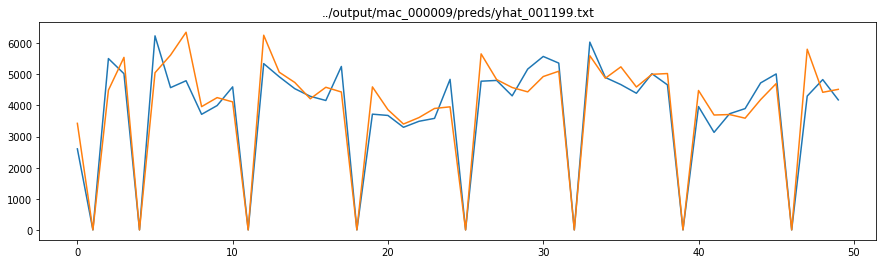

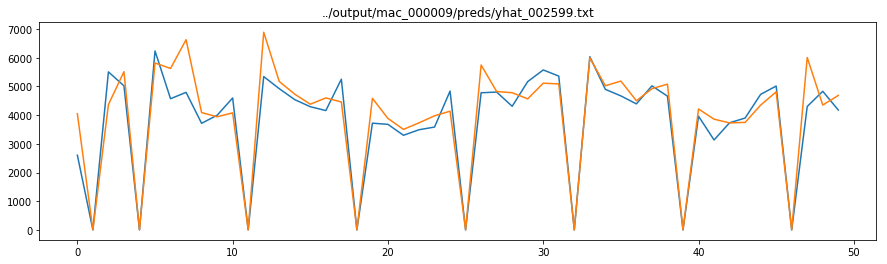

In [10]:
import os

def load_predictions(fname):
    lookback=20
    df_y = pd.read_csv('../data/eval1.csv', parse_dates=['Date'])
    df_yhat = pd.read_csv(fname, header=None)
    # take y without the first 'lookback'
    y = df_y.Sales.values[lookback:]
    yhat = df_yhat.values[:]
    y = y.reshape((y.shape[0], 1))
    np.concatenate((y, yhat), axis=1)
    return y, yhat

def show_y_yhat(y, yhat, title, show_error=False, win_from=0, win_to=-1, export_dir='../export'):
    y=y[win_from:win_to]
    yhat=yhat[win_from:win_to]
    plt.figure(figsize=(15,4))
    plt.title(title)
    if show_error:
        plt.plot(y-yhat)
    else:
        plt.plot(y)
        plt.plot(yhat)
    plt.show()

def iterate_predictions(job_name, step=1):
    folder = '../output/{}/preds'.format(job_name)
    files = map(lambda x: os.path.join(folder, x), os.listdir(folder))
    for preds in [files[x] for x in range(0,len(files), step)]:
        yield (preds,) + load_predictions(preds)

def mae(y, yhat):
    return np.mean(np.abs(y-yhat))

job_name='mac_000009'
step=2
show_error=True

for fname, y, yhat in list(iterate_predictions(job_name, step=8)):
    show_y_yhat(y, yhat, fname, show_error=False, win_from=50, win_to=100)

In [11]:
for fname, y, yhat in iterate_predictions(job_name, step=10):
    print fname, mae(y, yhat)

../output/mac_000009/preds/yhat_001199.txt 396.471447097
../output/mac_000009/preds/yhat_002399.txt 401.161195088


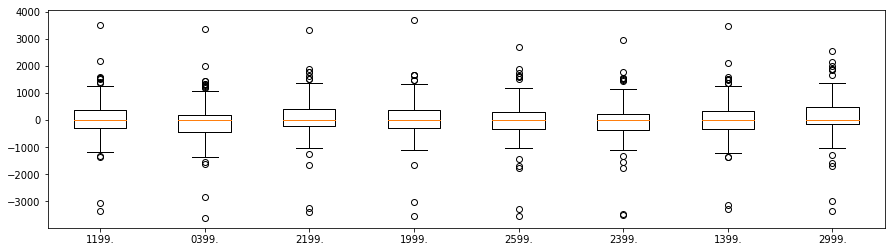

In [9]:
predictions = [x for x in iterate_predictions(job_name, step=2)]
labels = [fname[-8:-3] for fname, _, _ in predictions]
tmp = [y-yhat for fname, y, yhat in predictions]
tmp = np.array(tmp)
rows,cols,one=tmp.shape
tmp = tmp.reshape((rows,cols))
tmp.shape

tmp = np.transpose(tmp)

plt.figure(figsize=(15,4))
plt.boxplot(tmp, labels=labels)
plt.show()
    